In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv("IMDb Movies India.csv.zip", encoding='ISO-8859-1')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
df=df.drop_duplicates()
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   object 
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   object 
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), object(9)
memory usage: 486.3+ KB


In [ ]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [ ]:
df['Name'] = df['Name'].str.replace(r'[#\?]', '', regex=True)

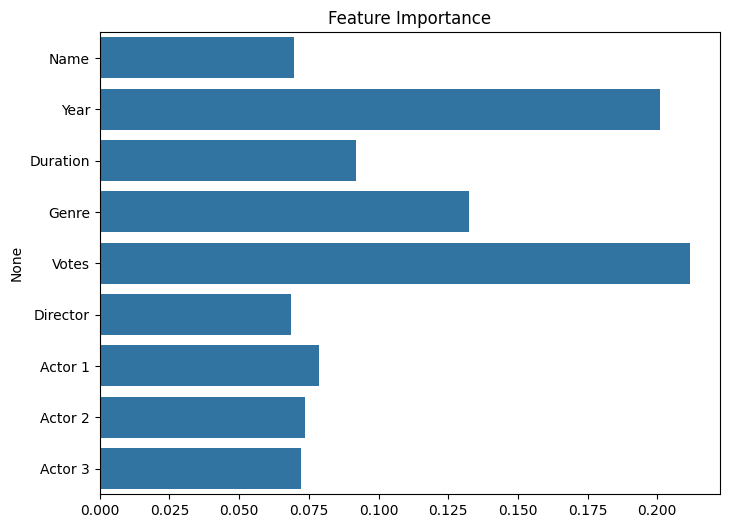

In [ ]:
import seaborn as sns

importances = model.feature_importances_
features = x.columns

plt.figure(figsize=(8,6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance')
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Name']=le.fit_transform(df['Name'])
df['Genre']=le.fit_transform(df['Genre'])
df['Director']=le.fit_transform(df['Director'])
df['Actor 1']=le.fit_transform(df['Actor 1'])
df['Actor 2']=le.fit_transform(df['Actor 2'])
df['Actor 3']=le.fit_transform(df['Actor 3'])
df['Duration']=df['Duration'].str.replace(r'min', '', regex=True)
df['Year']=df['Year'].str.replace(r'[\(\)]','',regex=True)
df['Votes']=df['Votes'].str.replace(r',','',regex=True)

In [ ]:
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
df.dropna(inplace=True)

In [ ]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,1710,2019,109,229,7.0,8,629,1352,2272,319
3,5258,2019,110,184,4.4,35,1335,1198,719,2148
5,1,1997,147,157,4.7,827,1530,378,75,2045
6,2,2005,142,289,7.4,1086,2044,692,1112,2524
8,74,2012,82,320,5.6,326,135,1934,1175,1013
...,...,...,...,...,...,...,...,...,...,...
15493,5379,2015,115,229,6.1,408,1223,1861,1801,1615
15494,5380,2001,153,133,6.2,1496,2059,763,1619,1184
15503,5381,1989,125,28,5.8,44,1793,406,754,1685
15505,5383,1999,129,38,4.5,655,1025,112,2164,314


In [ ]:
x=df.drop(['Rating'],axis=1)
y=df['Rating']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('RMSE:', mean_squared_error(y_test, y_pred))

R2 Score: 0.3270164778292102
RMSE: 1.2461929611307416
